In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("nostop.lemmas.csv")

In [3]:
# Drop any NaN rows
df = df.dropna()

In [4]:
df= df.iloc[:1000]

In [6]:
df, cue = encode_target(df, "cue", "cue_code")
df, feature = encode_target(df, "feature", "feature_code")
df, pos_code = encode_target(df, "pos", "pos_code")
df, targets = encode_target(df, "lemma", "target")

In [7]:
features = list(df.columns[4:7])
Y = df["target"]
X = df[features]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.20, random_state=42)


In [182]:
# Creating Decision tree by Training set
dt = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99,max_leaf_nodes = None)
clf = dt.fit(X_train, y_train)

In [10]:
dot_data = tree.export_graphviz(clf, filled=True, rounded=True,
                                feature_names=features,
                               class_names=targets)

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
graph.write_pdf("Decision Tree.pdf")
graph.write_png("Decision Tree.png");

In [13]:
predicted_output = clf.predict(X_test);
print(predicted_output )

[ 96 224 239 202  47 210  14   7 198   0  79  47 159 234 210 253  36 253
 208 106  78  56   0  24  10  61  12 234 198 224 128  56  78   1  23  38
 213  66 234  47  20  10 108  26  26 106 253   1   0 239  78   7  36   0
  19   0 106   7  61  14   0  32  66  96  23 210 187 277  47  10  36 171
  80 198  12 108  78  17  67  23  61  47  26  47 106  36 198  78 239 108
  20 153 171  98 208   0 239   0  47 234 237 128 277  12  78  63  32 234
  38   1   0 207 300  79   0  36  12 207 172  32  56  14  23  78 106  20
  78  14 239 207  17 223   7  56   7  23  61  20  20  12  26  24 237 106
 202 202  79  12 213 108 141  38 277 141 259   0 108 213  37  79   1 207
  60  78 208 208  12 198  78 108  19 102  63  32 171  67 106  98 224 208
 171 210   4 172 202  61  78  80 237 239 202 202 198  38  56  10 108  96
  78   0]


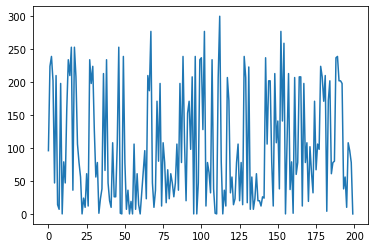

In [14]:
plt.plot(predicted_output)
plt.show()

In [15]:
actual_output = y_test.to_numpy()

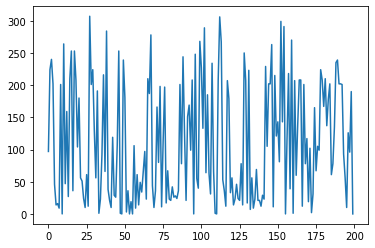

In [16]:
plt.plot(actual_output)
plt.show()

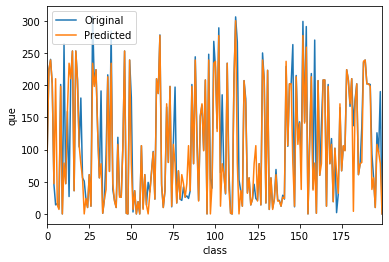

In [18]:
compare = pd.DataFrame({
    "Original":actual_output ,
    "Predicted":predicted_output 
})
ax = compare.plot()
ax.set_xlabel('class')
ax.set_ylabel('que');

In [17]:
# fitness fuction
def fcn_fitness(actual_output, predicted_output):
    fitness = 0
    ln = len(actual_output)
    for i in range(ln):
        #print(actual_output[i], predicted_output[i])
        if(actual_output[i] == predicted_output[i]):
            fitness = fitness + 1
    fitness = (fitness/ln)*100
    return fitness 
fitness = fcn_fitness(actual_output,predicted_output)

print(fitness)

47.5


In [183]:
# Decision Tree Features
'''
0 criterion: str {'gini','entropy'}
1 splitter :str {'best', 'random'} 
2 max_depth : int or None, optional (default=None)
3 min_samples_split : int, float, optional (default=2)
4 min_samples_leaf : int, float, optional (default=1)
5 min_weight_fraction_leaf : float, optional (default=0.)
6 max_features: int, float, str or None, optional (default=None)
7 random_state : int, RandomState instance or None, optional (default=None)
8 max_leaf_nodes : int or None, optional (default=None)
9 min_impurity_decrease : float, optional (default=0.)
'''

def create_decision_tree_clissifier_parameters():
    criterion = np.random.choice(['gini','entropy']) #np.random.randint(low=2, high=16)
    splitter = np.random.choice(['best', 'random'])
    max_depth = np.random.choice([None,np.random.randint(low=2, high=100)])
    min_samples_split = np.random.randint(low=2, high=10)
    min_samples_leaf =  np.random.choice([1,np.random.randint(low=2, high=100)])
    min_weight_fraction_leaf = np.random.uniform(low = 0.0, high= 0.5)
    max_features = np.random.uniform(low = 0.0001, high= 1.0)
    random_state = 42#np.random.randint(low=1, high=100)
    max_leaf_nodes = np.random.randint(low=1, high=100)
    min_impurity_decrease = np.random.choice([0.0,np.random.uniform(low=0.0, high=1.0)])
    ccp_alpha = np.random.choice([0.0,np.random.uniform(low=0.0, high=10.0)])
    
    return [criterion, splitter, max_depth, min_samples_split, min_samples_leaf,
            min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, 
            min_impurity_decrease]

test1 = create_decision_tree_clissifier_parameters()
test2 = create_decision_tree_clissifier_parameters()
print(test1)
print(test2)

['gini', 'best', None, 7, 1, 0.45976516660747524, 0.4341449434182202, 42, 18, 0.0]
['entropy', 'random', None, 6, 69, 0.3778701617173292, 0.43269051280348386, 42, 86, 0.0]


In [184]:
# Random parent selection
def parent_selection(population):
    p1 = np.random.randint(low=0, high=len(population)-1)
    p2 = np.random.randint(low=0, high=len(population)-1)
    return population[p1], population[p2]

In [185]:
def cross_over(p1, p2, length):
    point = np.random.randint(low=1, high= length-2)
    new_parameters = p1[:point]
    new_parameters += p2[point:]
    #print(point)
    return np.array(new_parameters).reshape(1, length)

print(test1)
print(test2)
cross_over(test1, test2, 10)

['gini', 'best', None, 7, 1, 0.45976516660747524, 0.4341449434182202, 42, 18, 0.0]
['entropy', 'random', None, 6, 69, 0.3778701617173292, 0.43269051280348386, 42, 86, 0.0]


array([['gini', 'best', None, 7, 1, 0.3778701617173292,
        0.43269051280348386, 42, 86, 0.0]], dtype=object)

In [1]:
import itertools

# Hyper parameters
population_size = 10
number_gen = 1
length = 10 # Changes depending on clustering algorithm parameter size

population = [create_decision_tree_clissifier_parameters() for _ in range(population_size)]
# Genetic algorithm
# Parent Selection
# Crossover
# Mutation
# Survivor
#for i in population:
#    print(i)
for gen in range(number_gen):
    child_pop = []
    for _ in range(population_size):
        # Parent Selection
        parent1, parent2 = parent_selection(population)
        
        # Crossover
        child = cross_over(parent1, parent2, length).tolist()
        #print(child)
        #child = list(itertools.chain(*child))
        #print(child[2])
        child_pop.append(child)
        
    model_pop = []
    child_model_pop = []
    for i, sample in enumerate(population):
        try:
            model = DecisionTreeClassifier(criterion =sample[0] , splitter = sample[1], max_depth = sample[2], 
                                       min_samples_split = sample[3], min_samples_leaf = sample[4],
                                       min_weight_fraction_leaf = sample[5], max_features = sample[6], 
                                       random_state = sample[7], max_leaf_nodes = sample[8], 
                                       min_impurity_decrease = sample[9]) 
        
            model = model.fit(X_train, y_train)
            predicted_output = model.predict(X_test);
            actual_output = y_test.to_numpy()
            fitness =  fcn_fitness(actual_output,predicted_output)
        except:
            flag = True
            while flag:
                new_sample = create_decision_tree_clissifier_parameters()
                try:
                    model = DecisionTreeClassifier(criterion =sample[0] , splitter = sample[1], max_depth = sample[2], 
                                       min_samples_split = sample[3], min_samples_leaf = sample[4],
                                       min_weight_fraction_leaf = sample[5], max_features = sample[6], 
                                       random_state = sample[7], max_leaf_nodes = sample[8], 
                                       min_impurity_decrease = sample[9]) 
        
                    model = model.fit(X_train, y_train)
                    predicted_output = model.predict(X_test);
                    actual_output = y_test.to_numpy()
                    fitness =  fcn_fitness(actual_output,predicted_output)
                    flag = False
                except:
                    pass
            
        # Append sample and fitness 
        model_pop.append([sample, fitness])
    for i in model_pop:
        print(i)
        
        
    for i, sample in enumerate(child_pop):
        try:
            model = DecisionTreeClassifier(criterion =sample[0] , splitter = sample[1], max_depth = sample[2], 
                                       min_samples_split = sample[3], min_samples_leaf = sample[4],
                                       min_weight_fraction_leaf = sample[5], max_features = sample[6], 
                                       random_state = sample[7], max_leaf_nodes = sample[8], 
                                       min_impurity_decrease = sample[9]) 
        
            model = model.fit(X_train, y_train)
            predicted_output = model.predict(X_test);
            actual_output = y_test.to_numpy()
            fitness =  fcn_fitness(actual_output,predicted_output)
        except:
            flag = True
            while flag:
                new_sample = create_decision_tree_clissifier_parameters()
                try:
                    model = DecisionTreeClassifier(criterion =sample[0] , splitter = sample[1], max_depth = sample[2], 
                                       min_samples_split = sample[3], min_samples_leaf = sample[4],
                                       min_weight_fraction_leaf = sample[5], max_features = sample[6], 
                                       random_state = sample[7], max_leaf_nodes = sample[8], 
                                       min_impurity_decrease = sample[9]) 
        
                    model = model.fit(X_train, y_train)
                    predicted_output = model.predict(X_test);
                    actual_output = y_test.to_numpy()
                    fitness =  fcn_fitness(actual_output,predicted_output)
                    flag = False
                except:
                    pass
            
        # Append sample and fitness 
        child_model_pop.append([sample, fitness])
        
    sorted_pop = sorted(model_pop, key=lambda fit: fit[1])
    sorted_child_pop = sorted(child_model_pop, key=lambda fit: fit[1])
    sorted_pop[-1] = sorted_child_pop[0]
    population = [sample[0] for sample in sorted_pop]
    print("Epoch: ", gen)
        

NameError: name 'create_decision_tree_clissifier_parameters' is not defined

In [179]:
np.random.choice([1,np.random.randint(low=2, high=100)])

5